In [ ]:
import kagglehub
import pandas as pd
import os

# 1️⃣ Download the latest dataset
path = kagglehub.dataset_download("sandhyakrishnan02/latest-covid-19-dataset-worldwide")
print("Dataset downloaded to:", path)

# 2️⃣ List files in the dataset folder
print("Files in dataset folder:", os.listdir(path))

# 3️⃣ Load the main CSV file (replace with actual CSV name from os.listdir)
csv_file = os.path.join(path, "covid_worldwide.csv")


Dataset downloaded to: /kaggle/input/latest-covid-19-dataset-worldwide
Files in dataset folder: ['owid-covid-data.csv']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import os

# ---------- 1) Load CSV ----------
dataset_path = "/kaggle/input/latest-covid-19-dataset-worldwide/owid-covid-data.csv"
df = pd.read_csv(dataset_path)
print("✅ Dataset loaded. Shape:", df.shape)
df.head()

✅ Dataset loaded. Shape: (302512, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# ---------- 2) Clean ----------
df['date'] = pd.to_datetime(df['date'], errors='coerce')
countries = ["Kenya", "United States", "India"]
df_c = df[df['location'].isin(countries)].copy()

# Fill numeric NaNs with 0
num_cols = df_c.select_dtypes(include=[np.number]).columns
df_c[num_cols] = df_c[num_cols].fillna(0)

# Derived metric
with np.errstate(divide='ignore', invalid='ignore'):
    df_c['death_rate'] = np.where(df_c['total_cases'] > 0,
                                  df_c['total_deaths'] / df_c['total_cases'],
                                  0.0)

summary_stats = df_c.groupby('location').agg(
    total_cases=('total_cases', 'max'),
    total_deaths=('total_deaths', 'max'),
    total_vaccinated=('people_vaccinated', 'max')
).reset_index()

# ---------- 3) Prepare figures ----------
figs = []
def add_fig():
    fig = plt.gcf()
    fig.tight_layout()
    figs.append(fig)

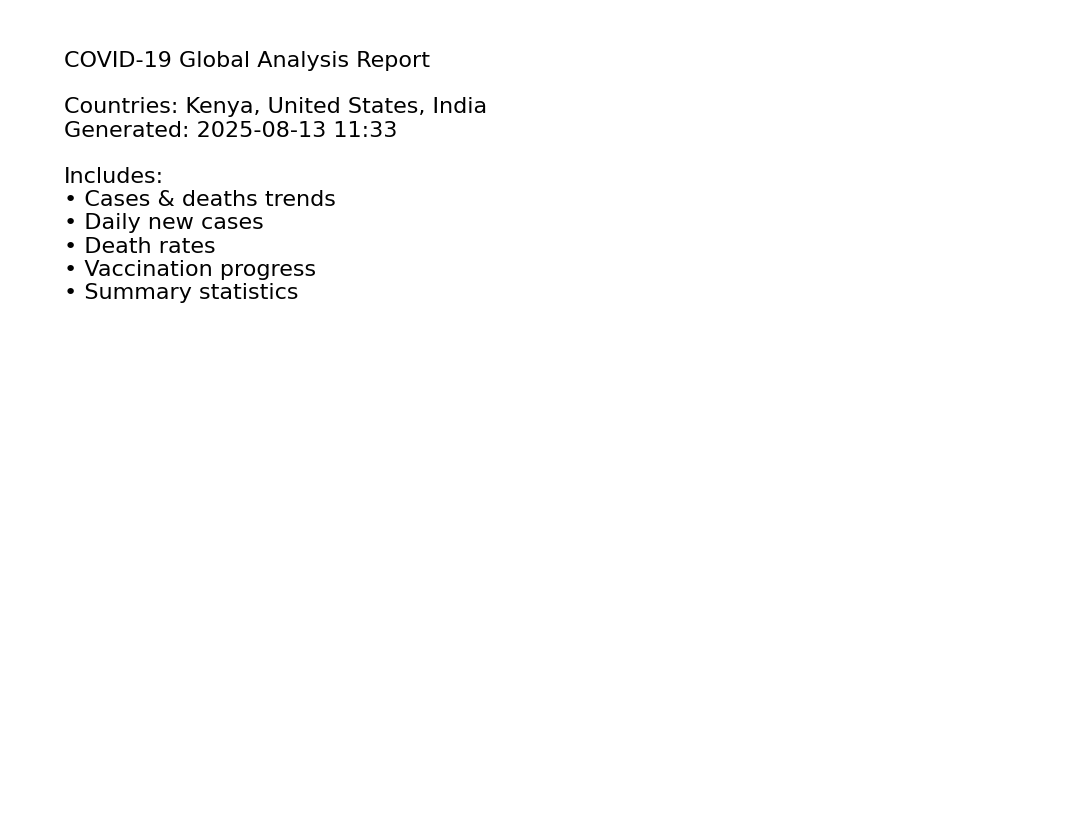

In [ ]:
# Cover page
plt.figure(figsize=(11,8.5))
plt.axis('off')
cover_text = (
    "COVID-19 Global Analysis Report\n\n"
    "Countries: Kenya, United States, India\n"
    f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}\n\n"
    "Includes:\n"
    "• Cases & deaths trends\n"
    "• Daily new cases\n"
    "• Death rates\n"
    "• Vaccination progress\n"
    "• Summary statistics"
)
plt.text(0.05, 0.95, cover_text, va='top', fontsize=16)
add_fig()

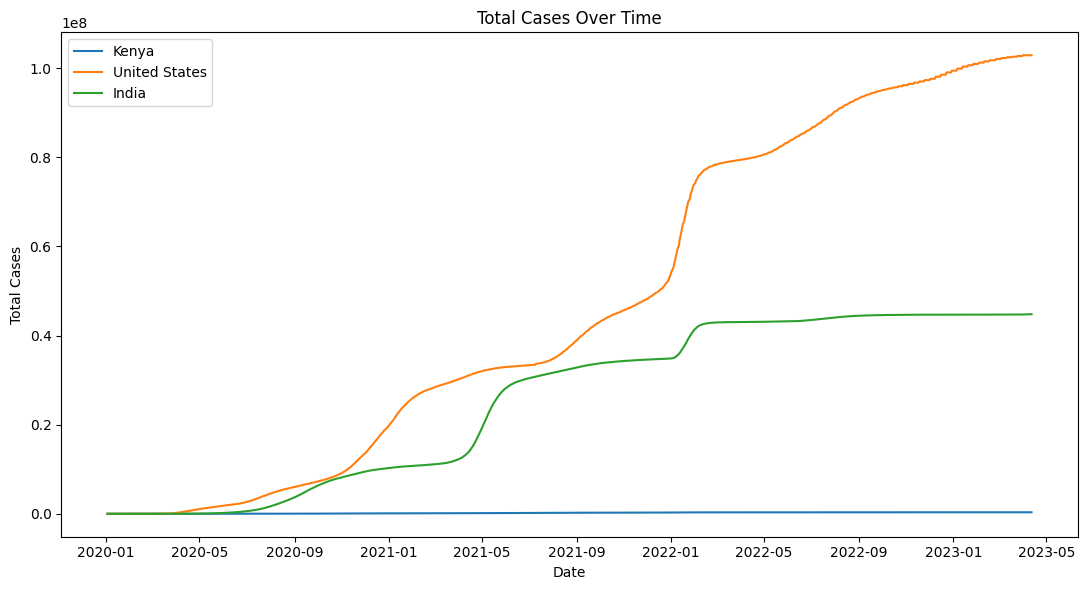

In [ ]:
# Total cases over time
plt.figure(figsize=(11,6))
for c in countries:
    sub = df_c[df_c['location']==c]
    plt.plot(sub['date'], sub['total_cases'], label=c)
plt.title("Total Cases Over Time")
plt.xlabel("Date"); plt.ylabel("Total Cases")
plt.legend()
add_fig()

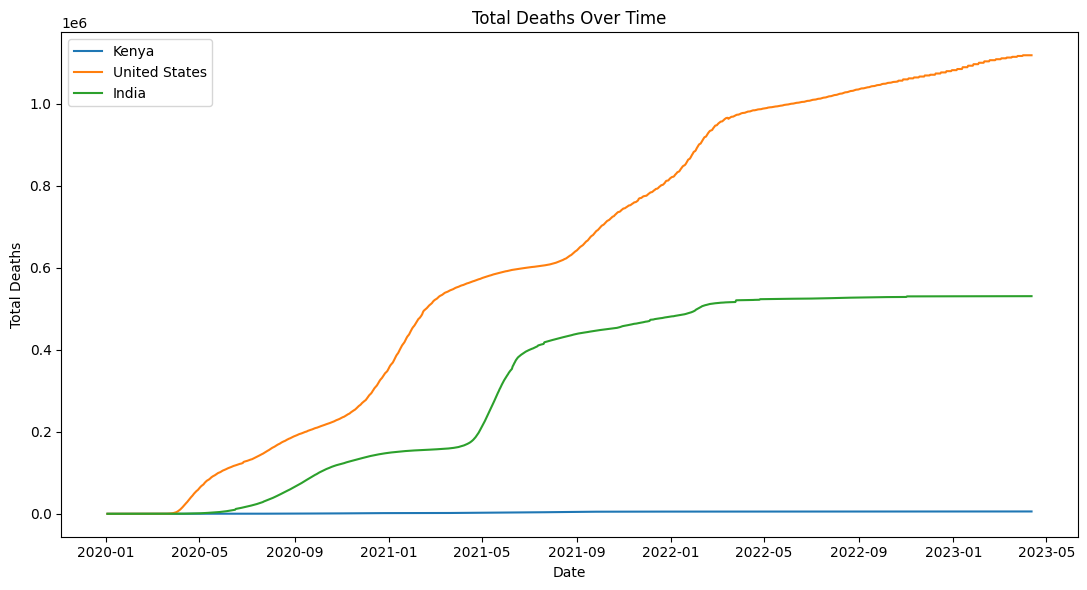

In [ ]:
# Total deaths over time
plt.figure(figsize=(11,6))
for c in countries:
    sub = df_c[df_c['location']==c]
    plt.plot(sub['date'], sub['total_deaths'], label=c)
plt.title("Total Deaths Over Time")
plt.xlabel("Date"); plt.ylabel("Total Deaths")
plt.legend()
add_fig()

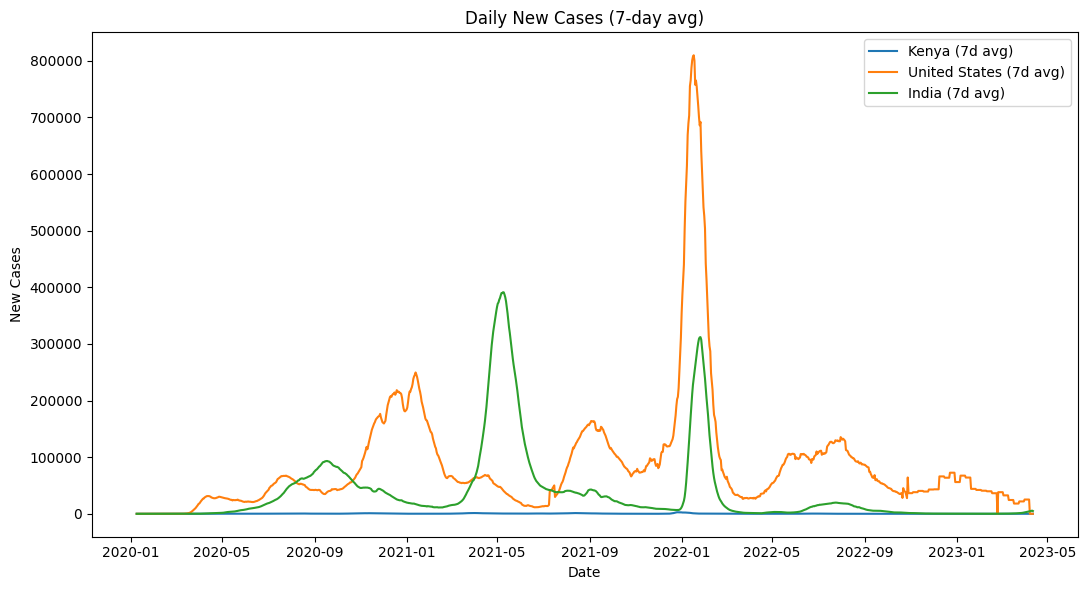

In [ ]:
# Daily new cases (7-day rolling)
plt.figure(figsize=(11,6))
for c in countries:
    sub = df_c[df_c['location']==c]
    plt.plot(sub['date'], sub['new_cases'].rolling(7).mean(), label=f"{c} (7d avg)")
plt.title("Daily New Cases (7-day avg)")
plt.xlabel("Date"); plt.ylabel("New Cases")
plt.legend()
add_fig()

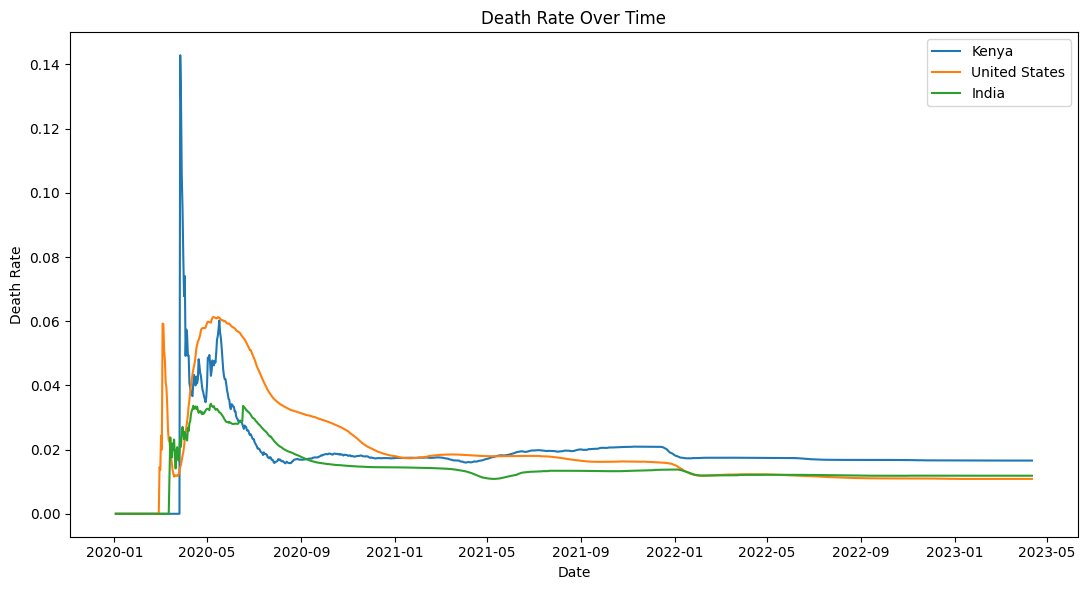

In [ ]:
# Death rate over time
plt.figure(figsize=(11,6))
for c in countries:
    sub = df_c[df_c['location']==c]
    plt.plot(sub['date'], sub['death_rate'], label=c)
plt.title("Death Rate Over Time")
plt.xlabel("Date"); plt.ylabel("Death Rate")
plt.legend()
add_fig()

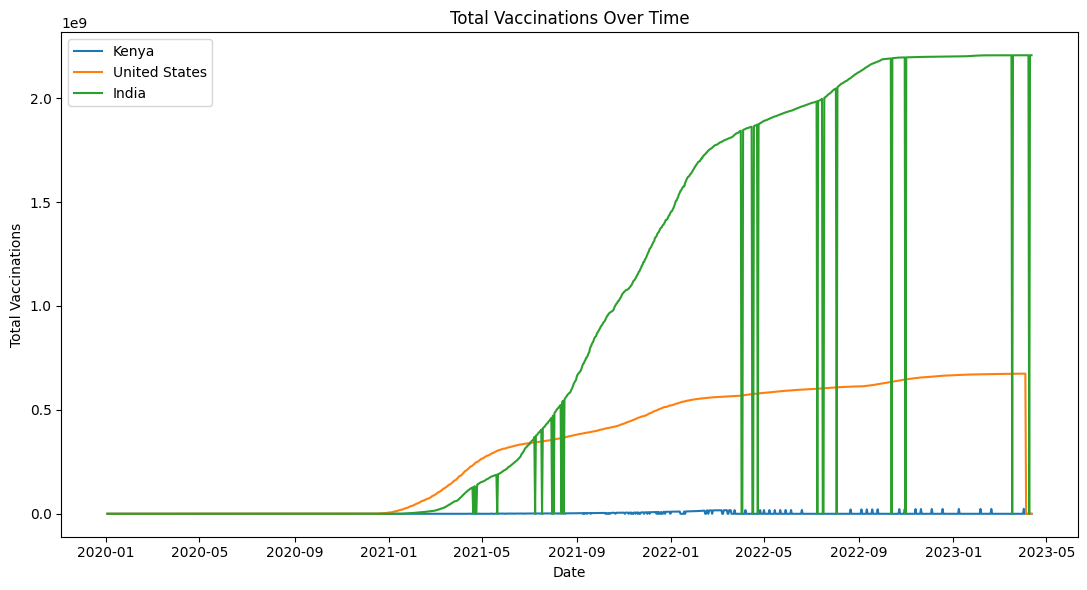

In [ ]:
# Vaccinations over time
plt.figure(figsize=(11,6))
for c in countries:
    sub = df_c[df_c['location']==c]
    plt.plot(sub['date'], sub['total_vaccinations'], label=c)
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date"); plt.ylabel("Total Vaccinations")
plt.legend()
add_fig()

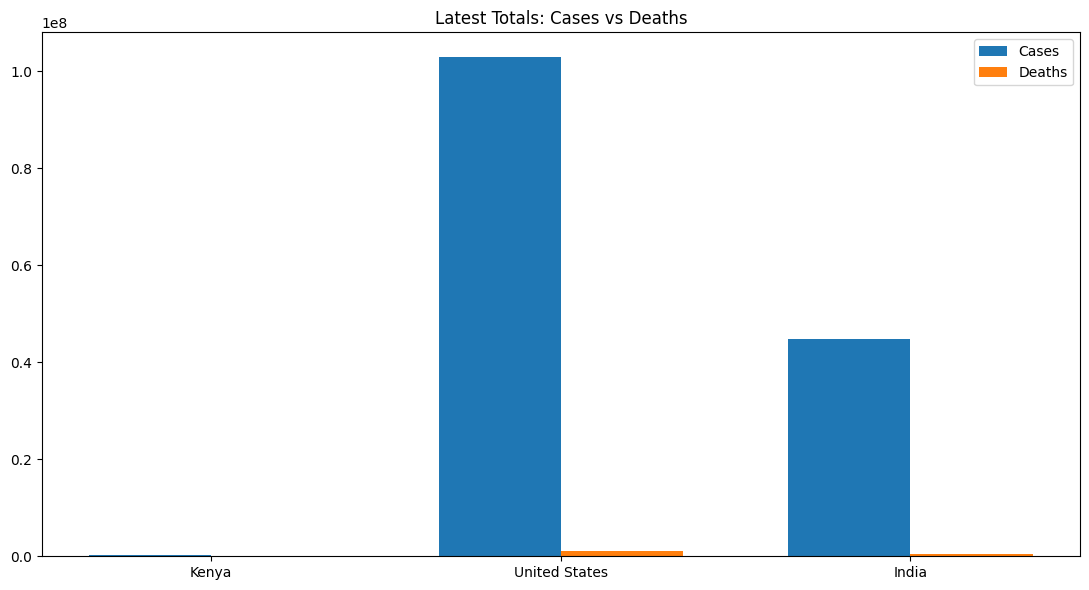

In [ ]:
# Latest totals: bar chart
latest = df_c.sort_values('date').groupby('location').tail(1)
plt.figure(figsize=(11,6))
x = np.arange(len(countries))
width = 0.35
plt.bar(x - width/2, latest.set_index('location').loc[countries,'total_cases'], width, label='Cases')
plt.bar(x + width/2, latest.set_index('location').loc[countries,'total_deaths'], width, label='Deaths')
plt.xticks(x, countries)
plt.title("Latest Totals: Cases vs Deaths")
plt.legend()
add_fig()

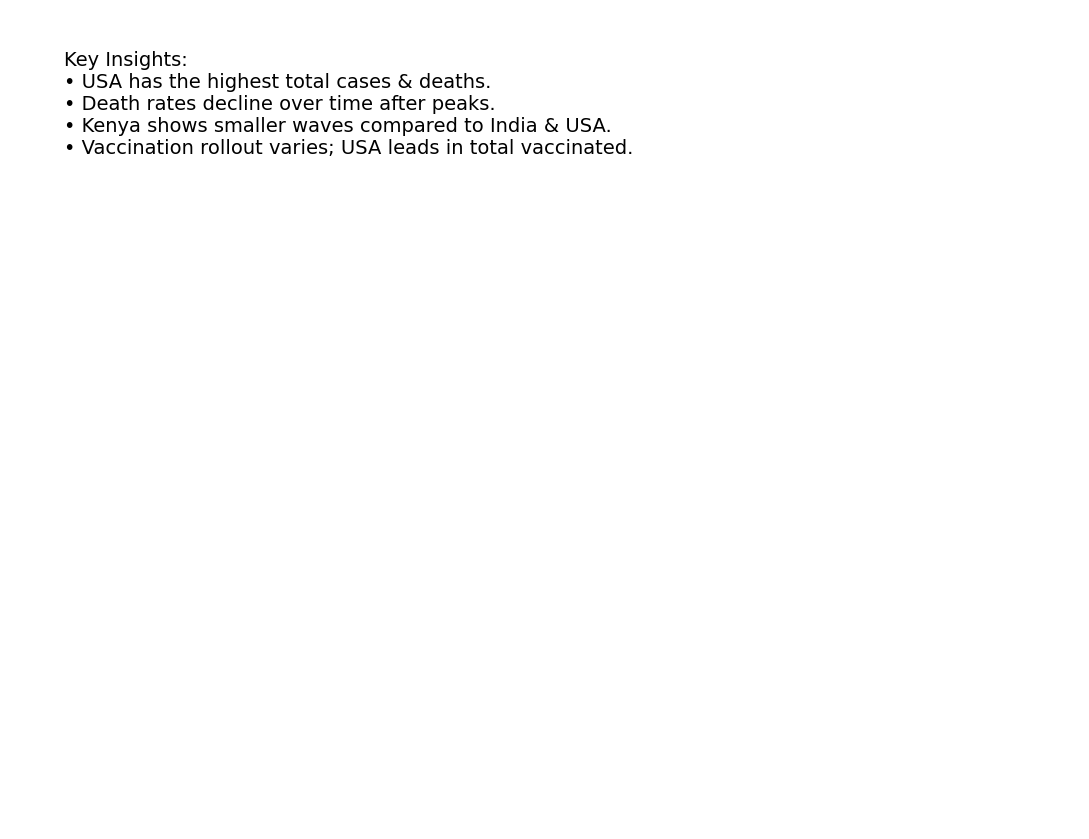

In [ ]:
# Insights page
plt.figure(figsize=(11,8.5))
plt.axis('off')
insights = [
    "Key Insights:",
    "• USA has the highest total cases & deaths.",
    "• Death rates decline over time after peaks.",
    "• Kenya shows smaller waves compared to India & USA.",
    "• Vaccination rollout varies; USA leads in total vaccinated."
]
plt.text(0.05,0.95,"\n".join(insights), va='top', fontsize=14)
add_fig()

In [ ]:
# ---------- 4) Export to PDF ----------
pdf_name = "covid_analysis_report.pdf"
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(pdf_name) as pdf:
    for fig in figs:
        pdf.savefig(fig)
    meta = pdf.infodict()
    meta['Title'] = 'COVID-19 Global Analysis Report'
    meta['Author'] = 'Colab Notebook'
    meta['CreationDate'] = datetime.now()

plt.close('all')
print(f"📄 PDF created: {pdf_name} — check the left Files pane to download.")

📄 PDF created: covid_analysis_report.pdf — check the left Files pane to download.
